In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, fmin_cg
import scipy.io
import math
from timeit import default_timer as timer

%matplotlib inline

In [2]:
input_layer_size  = 400;  # 20x20 Input Images of Digits
hidden_layer_size = 25;   # 25 hidden units
num_labels = 10;          # 10 labels, from 1 to 10   
                          # (note that we have mapped "0" to label 10)


In [3]:
def displayData(X):
    
    m = X.shape[0]
    plt.figure()
    
    if(m == 1):
        tmp = X[0,:].reshape(20,20, order='F')
        plt.imshow(tmp, cmap='gray_r')
    else:
        display_rows = math.floor(math.sqrt(m))
        display_cols = math.ceil(m / display_rows)
        # set up array
        fig, axarr = plt.subplots(nrows=display_rows, ncols=display_cols,
                                  figsize=(10,10))

        # loop over randomly drawn numbers
        for ii in range(display_rows):
            for jj in range(display_cols):
                tmp = X[ii*display_cols+jj,:].reshape(20,20, order='F')
                axarr[ii,jj].imshow(tmp, cmap='gray_r')
                plt.setp(axarr[ii,jj].get_xticklabels(), visible=False)
                plt.setp(axarr[ii,jj].get_yticklabels(), visible=False)

        fig.subplots_adjust(hspace=0, wspace=0)

Loading and Visualizing Data ...



<Figure size 432x288 with 0 Axes>

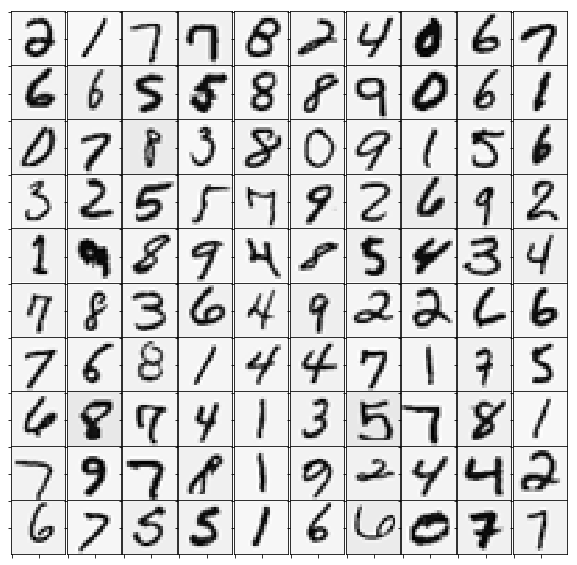

In [8]:
print('Loading and Visualizing Data ...\n')

mat = scipy.io.loadmat('ex4data1')
X = np.matrix(mat.get('X'))
m = X.shape[0]
y = np.matrix(mat.get('y'))

# Randomly select 100 data points to display
rand_indices = np.random.permutation(m)
sel = X[rand_indices[0:100], :]

displayData(sel)

In [9]:
print('\nLoading Saved Neural Network Parameters ...\n')

# Load the weights into variables Theta1 and Theta2
mat = scipy.io.loadmat('ex4weights.mat')
Theta1 = np.matrix(mat.get('Theta1'))
Theta2 = np.matrix(mat.get('Theta2'))

# Unroll parameters 
nn_params = np.concatenate((Theta1.ravel() , Theta2.ravel()), axis=1).T


Loading Saved Neural Network Parameters ...



In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoidGradient(z):
    g = np.multiply(sigmoid(z), (1-sigmoid(z)));
    return g

In [11]:
def nnCostFunction(nn_params,  input_layer_size,  hidden_layer_size,  num_labels, \
                                   X, y, lambda_t):
    eps = 1e-15
    
    Theta1 = np.reshape(nn_params[0:hidden_layer_size * (input_layer_size + 1)], \
                     (hidden_layer_size, (input_layer_size + 1)));

    Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):], \
                     (num_labels, (hidden_layer_size + 1)));

    # Setup some useful variables
    m = X.shape[0]

    # You need to return the following variables correctly 
    J = 0;
    Theta1_grad = np.zeros(Theta1.shape);
    Theta2_grad = np.zeros(Theta2.shape);

    a1 = np.hstack((np.ones((m, 1)), X))
    z2 = np.matmul(a1, Theta1.T);
    a2 = sigmoid(z2);
    a2 = np.hstack((np.ones((z2.shape[0], 1)), a2))
    z3 = np.matmul(a2, Theta2.T);
    h = sigmoid(z3);

    y1 = np.zeros((y.shape[0], num_labels));
    y1[([x for x in range(0, y1.shape[0])] , tuple(y.ravel()-1))]=1
    
    J = - 1 / m * np.sum(np.multiply(y1, np.log(h)) + np.multiply((1-y1), np.log(1-h+eps)))

    Theta1Sq = np.square(Theta1)
    Theta2Sq = np.square(Theta2)
    Theta1Sq[:, 0] = 0
    Theta2Sq[:, 0] = 0

    J = J + lambda_t/2/m*(np.sum(Theta1Sq) + np.sum(Theta2Sq))
    delta3 = h - y1
    delta2 = np.multiply(np.dot(delta3, Theta2)[:,1:], sigmoidGradient(z2))
        
    Delta1 = np.dot(delta2.T, a1)
    Delta2 = np.dot(delta3.T, a2)
    
    Theta1_grad = Delta1
    Theta2_grad = Delta2
    
    Theta1_grad = 1 / m * Theta1_grad + (lambda_t/m) * \
                    np.hstack((np.zeros((Theta1.shape[0], 1)), Theta1[:, 1:]))
    Theta2_grad = 1 / m * Theta2_grad + (lambda_t/m) * \
                    np.hstack((np.zeros((Theta2.shape[0], 1)), Theta2[:, 1:]))
    grad =  np.concatenate((Theta1_grad.ravel() , Theta2_grad.ravel()), axis=1).T
    
    #print("=> elasped nnCostFunction: %s s" % (timer() - t))
    
    return (J, grad)
    

In [12]:
print('\nFeedforward Using Neural Network ...\n')

# Weight regularization parameter (we set this to 0 here).
lambda_t = 0;

(J, grad) = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, \
                   num_labels, X, y, lambda_t);

print('Cost at parameters (loaded from ex4weights): %f (this value should be about 0.287629)\n' % J);


Feedforward Using Neural Network ...

Cost at parameters (loaded from ex4weights): 0.287629 (this value should be about 0.287629)



In [13]:
print('Checking Cost Function (w/ Regularization) ... \n')

#Weight regularization parameter (we set this to 1 here).
lambda_t = 1;

(J, grad) = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, \
                   num_labels, X, y, lambda_t)

print('Cost at parameters (loaded from ex4weights): %f ' \
         '\n(this value should be about 0.383770)\n' % J);

Checking Cost Function (w/ Regularization) ... 

Cost at parameters (loaded from ex4weights): 0.383770 
(this value should be about 0.383770)



In [14]:
print('\nEvaluating sigmoid gradient...\n')

g = sigmoidGradient(np.array([-1, -0.5, 0, 0.5, 1]));
print('Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:\n  ');
print(g);


Evaluating sigmoid gradient...

Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:
  
[0.19661193 0.23500371 0.25       0.23500371 0.19661193]


In [16]:
def randInitializeWeights(L_in, L_out):
    W = np.zeros((L_out, 1 + L_in))

    epsilon_init = 0.12
    W = np.random.rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init

    return W

In [17]:
print('\nInitializing Neural Network Parameters ...\n')

initial_Theta1 = np.matrix(randInitializeWeights(input_layer_size, hidden_layer_size))
initial_Theta2 = np.matrix(randInitializeWeights(hidden_layer_size, num_labels))

# Unroll parameters
initial_nn_params = np.concatenate((initial_Theta1.ravel() , initial_Theta2.ravel()), axis=1).T


Initializing Neural Network Parameters ...



In [18]:
def debugInitializeWeights(fan_out, fan_in):
    W = np.zeros((fan_out, 1 + fan_in));
    W = np.reshape(np.sin([i for i in range(1, W.size+1)]), W.shape, order='F') / 10
    return W


In [19]:
def computeNumericalGradient(J, theta):                
    numgrad = np.zeros(theta.shape)
    perturb = np.zeros(theta.shape)
    e = 1e-4
    for p in range(0, np.size(theta)):
        # Set perturbation vector
        perturb[p] = e
        loss1, _ = J(theta - perturb)
        loss2, _ = J(theta + perturb)
        # Compute Numerical Gradient
        numgrad[p] = (loss2 - loss1) / (2*e)
        perturb[p] = 0
    return numgrad

In [20]:
def checkNNGradients(lambda_t):
    input_layer_size = 3
    hidden_layer_size = 5
    num_labels = 3
    m = 5

    # We generate some 'random' test data
    Theta1 = np.matrix(debugInitializeWeights(hidden_layer_size, input_layer_size))
    Theta2 = np.matrix(debugInitializeWeights(num_labels, hidden_layer_size))
    # Reusing debugInitializeWeights to generate X
    X  = debugInitializeWeights(m, input_layer_size - 1)
    y  = 1+(np.array([[i for i in range(1, m+1)]]) % num_labels).T

    
    # Unroll parameters
    nn_params = np.concatenate((Theta1.ravel() , Theta2.ravel()), axis=1).T
    
    # Short hand for cost function
    costFunc = lambda p: nnCostFunction(p, input_layer_size, hidden_layer_size, \
                                   num_labels, X, y, lambda_t)

    (cost, grad) = costFunc(nn_params);
    numgrad = computeNumericalGradient(costFunc, nn_params);
    

    # Visually examine the two gradient computations.  The two columns
    # you get should be very similar. 
    print(np.hstack((numgrad, grad)))
    print('The above two columns you get should be very similar.\n (Left-Your Numerical Gradient, Right-Analytical Gradient)\n\n')

    # Evaluate the norm of the difference between two solutions.  
    # If you have a correct implementation, and assuming you used EPSILON = 0.0001 
    # in computeNumericalGradient.m, then diff below should be less than 1e-9
    grad_diff = numgrad-grad
    grad_add = numgrad+grad
    diff = np.divide(np.linalg.norm(grad_diff), np.linalg.norm(grad_add))

    print('If your backpropagation implementation is correct, then \n the relative difference will be small (less than 1e-9). \n\nRelative Difference: %g\n' % diff)

In [21]:
print('\nChecking Backpropagation... \n');

#  Check gradients by running checkNNGradients
checkNNGradients(0)


Checking Backpropagation... 

[[-9.27825235e-03 -9.27825236e-03]
 [-3.04979153e-06 -3.04978914e-06]
 [-1.75060082e-04 -1.75060082e-04]
 [-9.62660596e-05 -9.62660620e-05]
 [ 8.89911959e-03  8.89911960e-03]
 [ 1.42869427e-05  1.42869443e-05]
 [ 2.33146356e-04  2.33146357e-04]
 [ 1.17982664e-04  1.17982666e-04]
 [-8.36010761e-03 -8.36010762e-03]
 [-2.59383071e-05 -2.59383100e-05]
 [-2.87468727e-04 -2.87468729e-04]
 [-1.37149707e-04 -1.37149706e-04]
 [ 7.62813550e-03  7.62813551e-03]
 [ 3.69883257e-05  3.69883234e-05]
 [ 3.35320347e-04  3.35320347e-04]
 [ 1.53247084e-04  1.53247082e-04]
 [-6.74798369e-03 -6.74798370e-03]
 [-4.68759787e-05 -4.68759769e-05]
 [-3.76215583e-04 -3.76215587e-04]
 [-1.66560294e-04 -1.66560294e-04]
 [ 3.14544970e-01  3.14544970e-01]
 [ 1.64090819e-01  1.64090819e-01]
 [ 1.64567932e-01  1.64567932e-01]
 [ 1.58339334e-01  1.58339334e-01]
 [ 1.51127527e-01  1.51127527e-01]
 [ 1.49568335e-01  1.49568335e-01]
 [ 1.11056588e-01  1.11056588e-01]
 [ 5.75736493e-02  5.757

In [22]:
print('\nChecking Backpropagation (w/ Regularization) ... \n')

#  Check gradients by running checkNNGradients
lambda_t = 3;
checkNNGradients(lambda_t);

# Also output the costFunction debugging values
debug_J, _  = nnCostFunction(nn_params, input_layer_size, \
                          hidden_layer_size, num_labels, X, y, lambda_t);

print('\n\nCost at (fixed) debugging parameters (w/ lambda = %f): %f \n(for lambda = 3, this value should be about 0.576051)\n\n' % \
      (lambda_t, debug_J));



Checking Backpropagation (w/ Regularization) ... 

[[-9.27825235e-03 -9.27825236e-03]
 [-1.67679797e-02 -1.67679797e-02]
 [-6.01744725e-02 -6.01744725e-02]
 [-1.73704651e-02 -1.73704651e-02]
 [ 8.89911959e-03  8.89911960e-03]
 [ 3.94334829e-02  3.94334829e-02]
 [-3.19612287e-02 -3.19612287e-02]
 [-5.75658668e-02 -5.75658668e-02]
 [-8.36010761e-03 -8.36010762e-03]
 [ 5.93355565e-02  5.93355565e-02]
 [ 2.49225535e-02  2.49225535e-02]
 [-4.51963845e-02 -4.51963845e-02]
 [ 7.62813550e-03  7.62813551e-03]
 [ 2.47640974e-02  2.47640974e-02]
 [ 5.97717617e-02  5.97717617e-02]
 [ 9.14587966e-03  9.14587966e-03]
 [-6.74798369e-03 -6.74798370e-03]
 [-3.26881426e-02 -3.26881426e-02]
 [ 3.86410548e-02  3.86410548e-02]
 [ 5.46101547e-02  5.46101547e-02]
 [ 3.14544970e-01  3.14544970e-01]
 [ 1.18682669e-01  1.18682669e-01]
 [ 2.03987128e-01  2.03987128e-01]
 [ 1.25698067e-01  1.25698067e-01]
 [ 1.76337550e-01  1.76337550e-01]
 [ 1.32294136e-01  1.32294136e-01]
 [ 1.11056588e-01  1.11056588e-01]
 [ 

In [ ]:
print('\nTraining Neural Network... \n')
lambda_t = 1;
nnCostFunction_cost = lambda p: nnCostFunction(p.T, input_layer_size, hidden_layer_size, \
                                   num_labels, X, y, lambda_t)[0]
nnCostFunction_grad = lambda p: (nnCostFunction(p.T, input_layer_size, hidden_layer_size, \
                                   num_labels, X, y, lambda_t)[1]).A1

nn_params = fmin_cg(nnCostFunction_cost, initial_nn_params.T, fprime=nnCostFunction_grad, maxiter=50, disp=False)

Theta1 = np.reshape(nn_params[0:hidden_layer_size * (input_layer_size + 1)], \
            (hidden_layer_size, (input_layer_size + 1)));

Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):], \
            (num_labels, (hidden_layer_size + 1)));


Visualizing Neural Network... 



<Figure size 432x288 with 0 Axes>

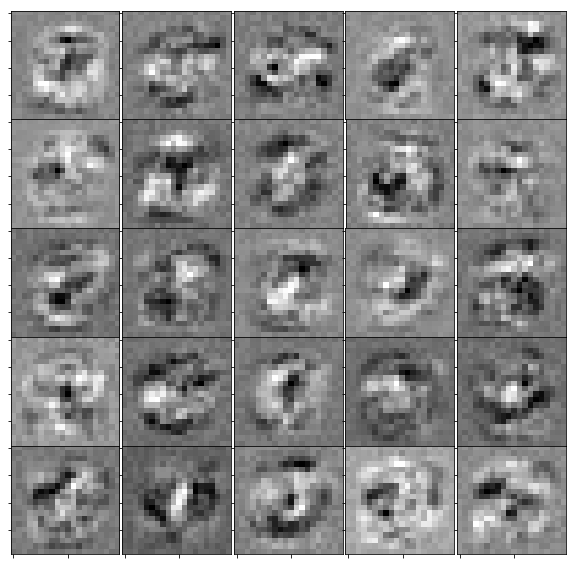

In [24]:

print('\nVisualizing Neural Network... \n')

displayData(Theta1[:, 1:]);

In [25]:
def predict(Theta1, Theta2, X):
    m = X.shape[0]
    num_labels, _ = Theta2.shape
    p = np.zeros((m, 1))

    X_t = np.hstack((np.ones((m, 1)), X))
    a2 = X_t * Theta1.T
    z2 = sigmoid(a2)
    z2 = np.hstack((np.ones((z2.shape[0], 1)), z2))
    a3 = z2 * Theta2.T
    z3 = sigmoid(a3)
    
    p = np.argmax(z3, axis=1)
    
    return p


In [ ]:
pred = predict(Theta1, Theta2, X);

print('\nTraining Set Accuracy: %f\n' % (np.mean((pred+1 == y)) * 100));

In [ ]:


lams = [0, 0.01, 1, 100]
maxIters = [50, 100, 200, 400]
for ct1, lam in enumerate(lams):
    for ct2, maxIter in enumerate(maxIters):
        
        # Create "short hand" for the cost function to be minimized
        nnCostFunction_cost = lambda p: nnCostFunction(p.T, input_layer_size, hidden_layer_size, \
                                           num_labels, X, y, lam)[0]

        nnCostFunction_grad = lambda p: (nnCostFunction(p.T, input_layer_size, hidden_layer_size, \
                                           num_labels, X, y, lam)[1]).A1

        # run minimization
        nn_params = fmin_cg(nnCostFunction_cost, initial_nn_params.T, fprime=nnCostFunction_grad, maxiter=maxIter, disp=False)

        # Obtain Theta1 and Theta2 back from nn_params
        Theta1 = np.reshape(nn_params[0:hidden_layer_size * (input_layer_size + 1)], \
                    (hidden_layer_size, (input_layer_size + 1)));

        Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):], \
                    (num_labels, (hidden_layer_size + 1)));
        
        pred = predict(Theta1, Theta2, X);

        print('\nTraining Set Accuracy for lambda=%f and max iterations=%d: %f\n' % (lam, maxIter, np.mean((pred+1 == y)) * 100));




Training Set Accuracy for lambda=0.000000 and max iterations=50: 96.220000


Training Set Accuracy for lambda=0.000000 and max iterations=100: 99.460000


Training Set Accuracy for lambda=0.000000 and max iterations=200: 100.000000


Training Set Accuracy for lambda=0.000000 and max iterations=400: 100.000000


Training Set Accuracy for lambda=0.010000 and max iterations=50: 95.880000


Training Set Accuracy for lambda=0.010000 and max iterations=100: 99.380000


Training Set Accuracy for lambda=0.010000 and max iterations=200: 100.000000

